In [9]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('adult-all.csv')


# Convert the income column to binary form
df['Salary'] = df['Salary'].apply(lambda x: 0 if x.strip() == '<=50K' else 1)




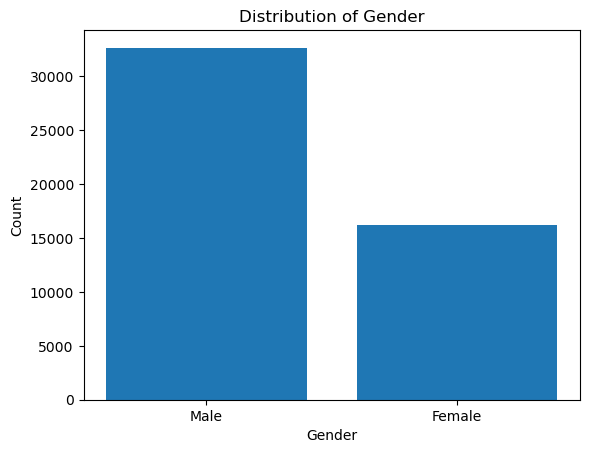

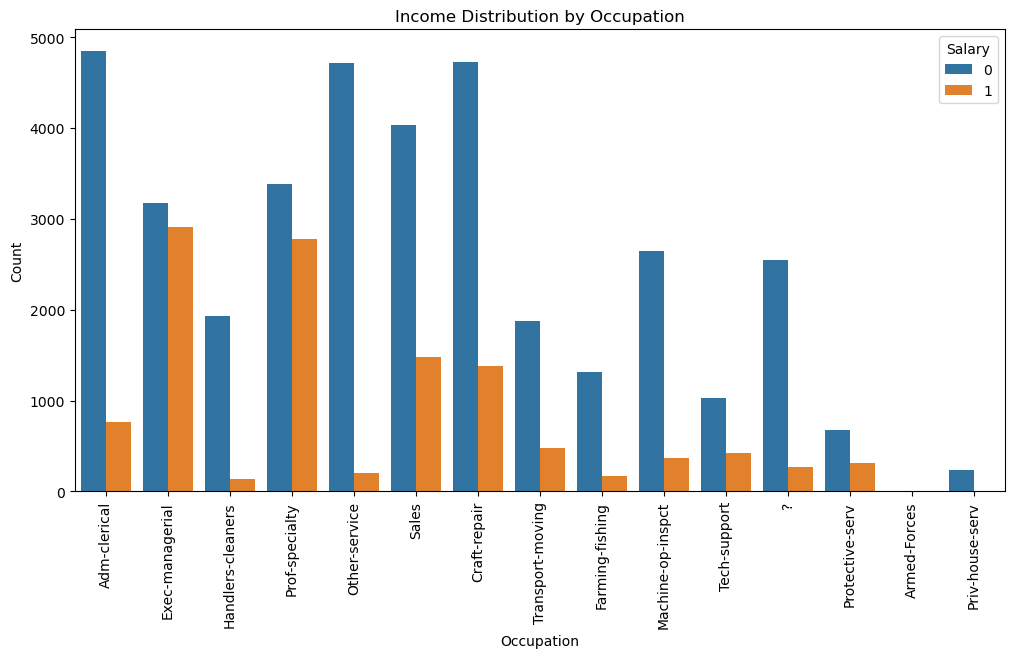

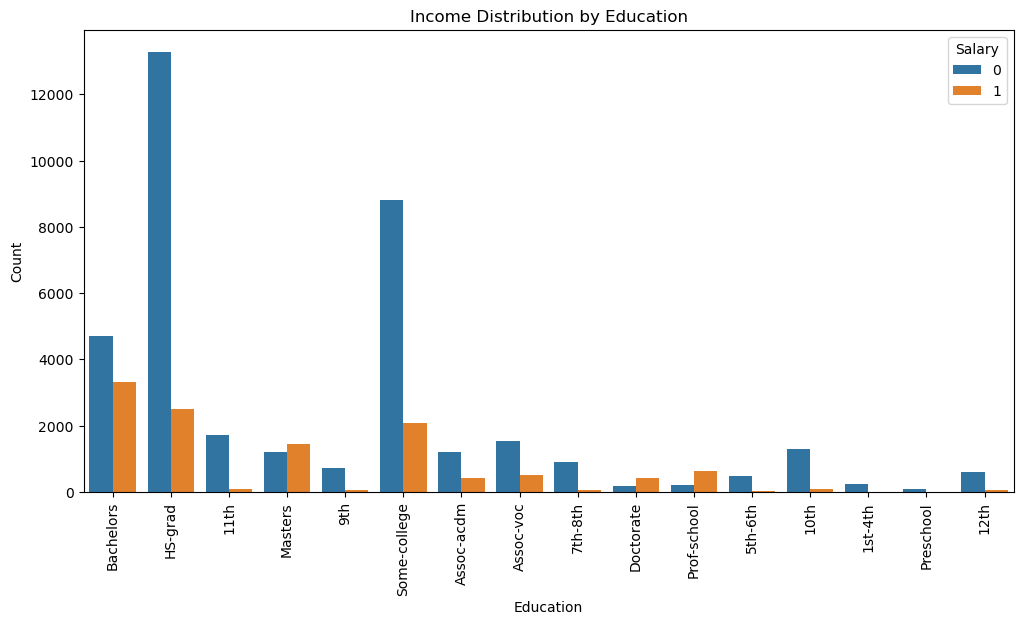

In [22]:
# Part 2: Data Exploration and Visualization
# Explore the dataset and visualize key attributes
# Example: Gender distribution
gender_counts = df['sex'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()



# Explore the relationship between income and occupation
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', hue='Salary', data=df)
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Income Distribution by Occupation')
plt.show()

# Explore the relationship between income and education
plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='Salary', data=df)
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Income Distribution by Education')
plt.show()

# Explore other attributes and visualize as desired


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')
# Initialize a OneHotEncoder object
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['education'] = label_encoder.fit_transform(df['education'])
df['sex'] = label_encoder.fit_transform(df['sex'])

# Select the independent variables (attributes) and the target variable (income)
X = df[['occupation', 'education', 'sex']]
y = df['Salary']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the income level for the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and interpret the results
print('Accuracy:', accuracy)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.7410175043504965
